In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

In [8]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# Load the prepared dataset

access_log = wrangle.wrangle_curriculum_access_log()

# Print the shape
print(access_log.shape)

# Take a peek at the dataset
access_log.head()

(719459, 9)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson,sublesson
timestamp,,,,,,,,,
2018-01-26 09:55:03,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,homepage,None
2018-01-26 09:56:02,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii,None
2018-01-26 09:56:05,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii,object-oriented-programming
2018-01-26 09:56:06,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,slides,object_oriented_programming
2018-01-26 09:56:24,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0,javascript-i,conditionals


### Q1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?
### Data Science Program

In [4]:
# Create the mask for ds program
mask_ds = (access_log.program_id == 3)

# Create the dataframe for ds program
log_ds = access_log[mask_ds]

# Print the shape
print(log_ds.shape)

# Take a peek at the new df
log_ds.head()

(68017, 9)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson,sublesson
timestamp,,,,,,,,,
2019-08-20 09:39:58,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:39:59,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:39:59,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:40:02,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:40:08,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None


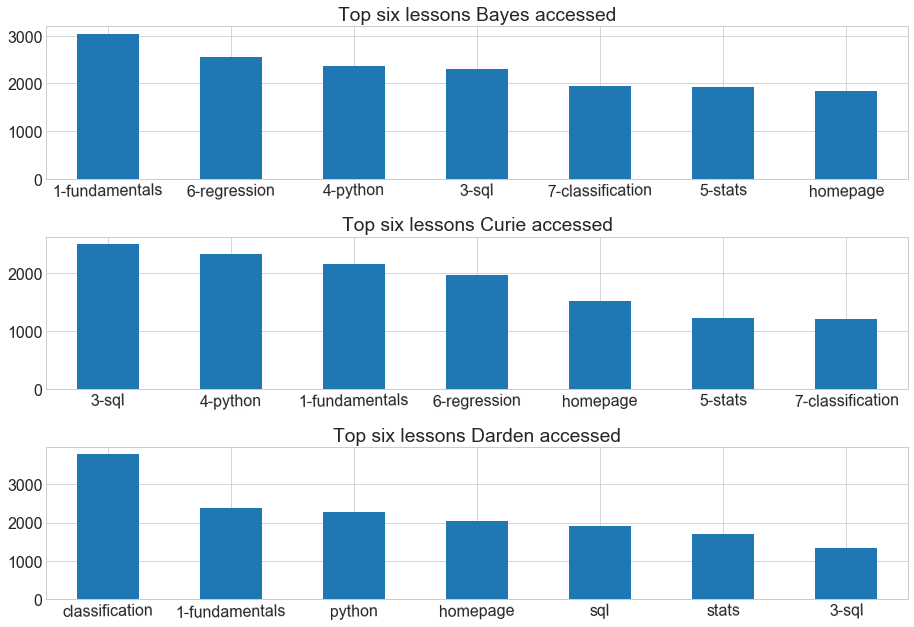

In [76]:
# Create fig and ax objects
fig, axes = plt.subplots(3, 1, figsize=(13,9))

# For Loop to barplot the top 6 lessons each cohort accessed

for ax, (name, subset) in zip(axes, log_ds.groupby('name')):
    subset.lesson.value_counts(ascending=False).head(7).plot(kind='bar', rot=1, ax=ax)
    ax.set_title(f'Top six lessons {name} accessed')

plt.tight_layout()